In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv('LendingClubLoanData.csv.gz',nrows=1000)
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [3]:
print(data.head())

         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_

In [4]:
print(data.describe())

                 id  member_id    loan_amnt  funded_amnt  funded_amnt_inv  \
count  1.000000e+03        0.0   1000.00000   1000.00000       1000.00000   
mean   6.836271e+07        NaN  15582.20000  15582.20000      15582.20000   
std    3.927437e+05        NaN   8694.53143   8694.53143       8694.53143   
min    6.591656e+07        NaN   1000.00000   1000.00000       1000.00000   
25%    6.837670e+07        NaN   9000.00000   9000.00000       9000.00000   
50%    6.846556e+07        NaN  15000.00000  15000.00000      15000.00000   
75%    6.853761e+07        NaN  21000.00000  21000.00000      21000.00000   
max    6.861706e+07        NaN  35000.00000  35000.00000      35000.00000   

          int_rate  installment     annual_inc  desc          dti  ...  \
count  1000.000000  1000.000000    1000.000000   0.0  1000.000000  ...   
mean     12.045020   450.765360   79993.828110   NaN    19.365010  ...   
std       4.404475   249.904156   41753.456497   NaN     8.346486  ...   
min       

In [5]:
print("Dataset shape:", data.shape)

Dataset shape: (1000, 151)


In [6]:
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


In [7]:
#Checking for Missing Values 
print(data.isnull().sum())

id                          0
member_id                1000
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                         ... 
settlement_status         978
settlement_date           978
settlement_amount         978
settlement_percentage     978
settlement_term           978
Length: 151, dtype: int64


In [8]:
#Percentage of missing values in each column 
missing_percentage = (data.isnull().sum()/len(data))*100
print(missing_percentage)

id                         0.0
member_id                100.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
                         ...  
settlement_status         97.8
settlement_date           97.8
settlement_amount         97.8
settlement_percentage     97.8
settlement_term           97.8
Length: 151, dtype: float64


In [9]:
#Drop columns with more than 30% missing values
data = data.dropna(thresh=len(data)*0.7,axis=1)

In [10]:
#Drop irrelevant columns, like IDs
data = data.drop(['id','member_id'], axis=1,errors='ignore')

In [11]:
#Display the cleaned dataset shape 
print("Cleaned dataset shape:", data.shape)

Cleaned dataset shape: (1000, 106)


In [12]:
# Step 1: Fill missing values for numeric columns
data_numeric = data.select_dtypes(include=['number'])  # Get only numeric columns
data[data_numeric.columns] = data_numeric.fillna(data_numeric.mean())  # Fill missing values with the mean

# Step 2: Fill missing values for non-numeric columns
data_non_numeric = data.select_dtypes(include=['object'])  # Get only non-numeric columns
for col in data_non_numeric.columns:
    data[col] = data[col].fillna(data[col].mode()[0])  # Fill with the most frequent value (mode)

# Step 3: Verify there are no missing values
print(data.isnull().sum())  # Should print 0 for all columns if successful

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
                             ..
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
Length: 106, dtype: int64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

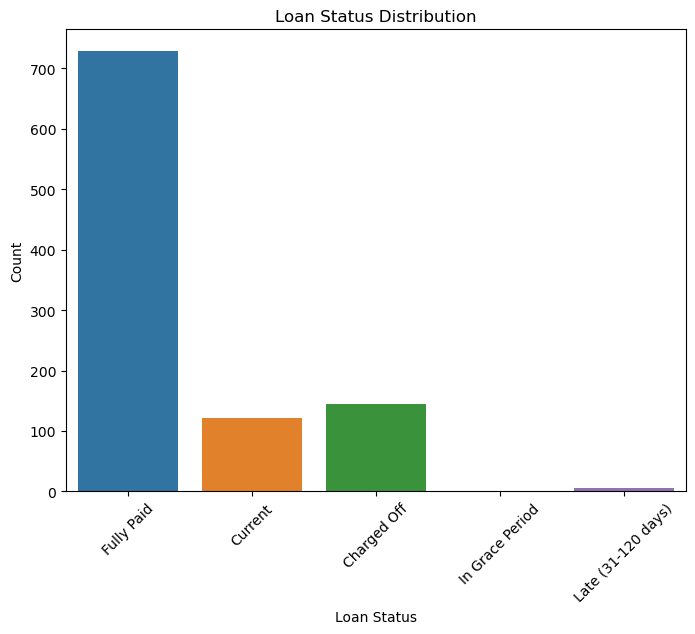

In [14]:
#Plot the distribution of loan status
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45) #Rotate labels if needed
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


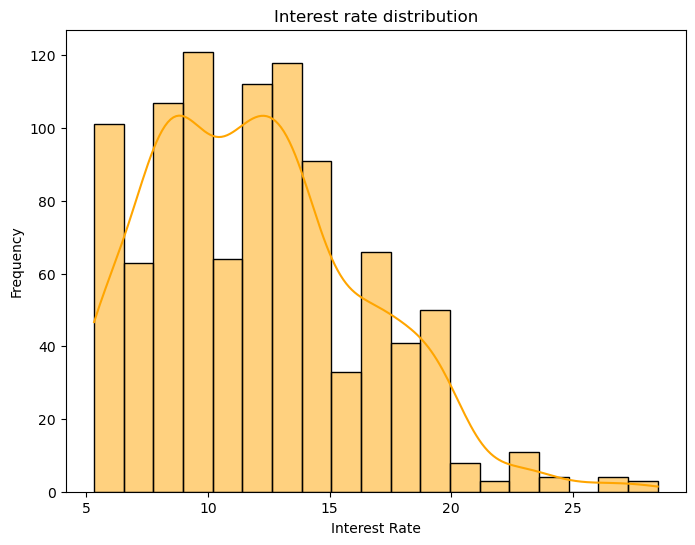

In [15]:
#Plot the Distribution of interest rates 
plt.figure(figsize=(8,6))
sns.histplot(data['int_rate'], kde=True,color='orange')
plt.title('Interest rate distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

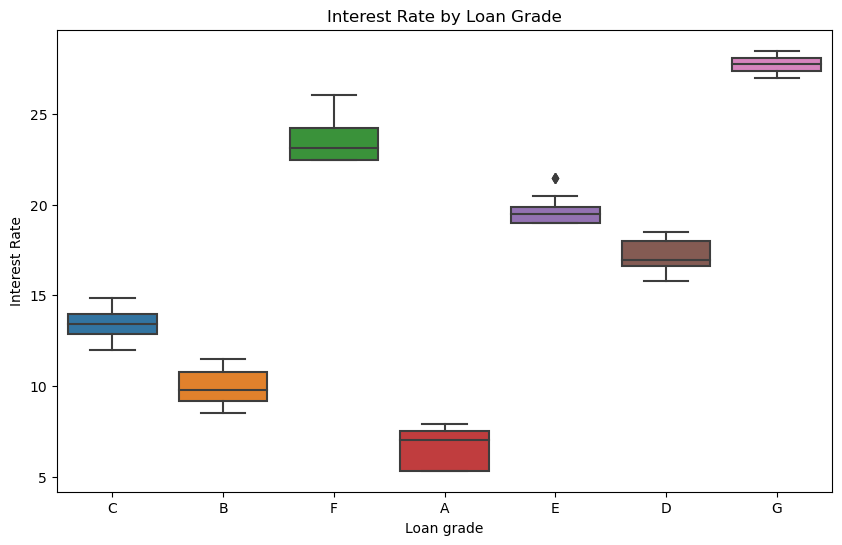

In [16]:
#Check the relationship between loan grade and interest rate 
plt.figure(figsize=(10,6))
sns.boxplot(x='grade',y = 'int_rate', data=data)
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan grade')
plt.ylabel('Interest Rate')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Define X(Features) and y(target)
X= data.drop('loan_status', axis=1) # Replace'loan_status' with your target column
y = data['loan_status']

In [19]:
#Convert categorical target variable to numeric if needed
#for example, use one-hot encoding
y = pd.get_dummies(y, drop_first=True)

In [20]:
#split the data into training and testing sets(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
#Print the sizes of the training and testing sets 
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (800, 105)
Testing set size: (200, 105)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Check for non-numeric columns in training data
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:\n", non_numeric_cols)

Non-numeric columns in X_train:
 Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


In [24]:
# One-Hot Encoding for categorical columns
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
                    'verification_status', 'pymnt_plan', 'purpose', 'title',
                    'zip_code', 'addr_state', 'initial_list_status', 'application_type',
                    'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [25]:
# Check if 'issue_d' exists in X_train
print("'issue_d' in X_train:", 'issue_d' in X_train.columns)

# If not, print all columns in X_train to troubleshoot
print("Columns in X_train:\n", X_train.columns)

'issue_d' in X_train: True
Columns in X_train:
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_title', 'annual_inc', 'issue_d', 'url', 'dti',
       ...
       'addr_state_UT', 'addr_state_VA', 'addr_state_VT', 'addr_state_WA',
       'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_w', 'application_type_Joint App',
       'debt_settlement_flag_Y'],
      dtype='object', length=593)


In [26]:
# Remove 'issue_d' from date_cols if it doesn't exist
date_cols = [col for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'] if col in X_train.columns]
print("Updated date columns:", date_cols)

Updated date columns: ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']


In [27]:
# Define the expected date format
expected_date_format = "%Y-%m-%d"  # Adjust based on your dataset's date format

# Dynamically identify date columns
date_cols = [col for col in X_train.columns if 'date' in col.lower()]

# Parse only the columns that exist
for col in date_cols:
    X_train[col] = pd.to_datetime(X_train[col], format=expected_date_format, errors='coerce')
    X_test[col] = pd.to_datetime(X_test[col], format=expected_date_format, errors='coerce')

    # Extract year and month as separate features
    X_train[f"{col}_year"] = X_train[col].dt.year
    X_train[f"{col}_month"] = X_train[col].dt.month

    X_test[f"{col}_year"] = X_test[col].dt.year
    X_test[f"{col}_month"] = X_test[col].dt.month

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [29]:
# Step 1: Define Features (X) and Target (y)
X = data.drop('loan_status', axis=1, errors='ignore')  # Replace 'loan_status' with your target column
y = data['loan_status']

In [30]:
# Step 2: Dynamically Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [31]:
# Step 3: Apply One-Hot Encoding to Categorical Columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [32]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Step 5: Align Train and Test Sets
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)  # Fill missing columns in X_test with 0

In [34]:
# Step 6: Convert Target Variable to Numeric (if needed)
y = pd.get_dummies(y, drop_first=True)

In [35]:
# Step 7: Train the Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
#Make Predictions on the test set 
y_pred = model.predict(X_test)

In [37]:
#Evaluate the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
                  precision    recall  f1-score   support

    Charged Off       1.00      0.78      0.88        37
        Current       0.96      0.96      0.96        24
     Fully Paid       0.94      1.00      0.97       138
In Grace Period       0.00      0.00      0.00         1

       accuracy                           0.95       200
      macro avg       0.72      0.69      0.70       200
   weighted avg       0.95      0.95      0.95       200



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
